# AIM:
    Transform the data

## dataset:
 - create clean data-set
 - add noise to data
 - plot noisy data-set

## cleaning functions:
 - input data
 - test to clean
 - show final
 

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

plt.rcParams['figure.figsize'] = (12,8)

In [2]:
np.random.seed(23100801)
def get_clean_data(N_c):
    eps = np.random.rand(N_c)
    x = np.linspace(0,1,N_c)
    y = np.linspace(0,1,N_c)
    area = np.random.rand(N_c)
    return pd.DataFrame({
        'clean_x': x,
        'clean_y': y,
        'clean_area': area,
    })

def get_messy_data(N):
    x = np.random.rand(N)
    y = np.random.rand(N)
    area = np.random.rand(N)
    
#     area= np.sin(np.pi*(x+np.random.rand(1)))*np.cos(y*np.pi+x)*\
# (30 * np.random.rand(N))**1.7  # 0 to 15 point radii
    return pd.DataFrame({
        'mess_x': x,
        'mess_y': y,
        'mess_area': area,
    })

def get_dataset(count, split=1):
    df = pd.DataFrame()
    clean_count = int(count*split)
    messy_count = int(count-clean_count)
#     print('{: ^10}|{: ^10}|{: ^10}'.format('clean', 'messy','count'))
#     print('{: ^10}|{: ^10}|{: ^10}'.format(clean_count, messy_count,count))
    
    clean_data = get_clean_data(clean_count)
    messy_data = get_messy_data(messy_count)
    
    df['x'] = clean_data['clean_x'].append(messy_data['mess_x'], ignore_index=True)
    df['y'] = clean_data['clean_y'].append(messy_data['mess_y'], ignore_index=True)
    df['a'] = clean_data['clean_area'].append(messy_data['mess_area'], ignore_index=True)
    
    return df
    
# x_clean, y_clean, area_clean = get_clean_data(100)
# print(x_clean, y_clean, area_clean )
# sns.scatterplot(x_clean, y_clean, s=np.absolute(area_clean))

# x_mess, y_mess, area_mess = get_messy_data(100)
# print(x_mess, y_mess, area_mess )
# sns.scatterplot(x_mess, y_mess, s=np.absolute(area_))


# get_dataset(100, 1/3)
# N_c = 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cd71048>,
      dtype=object)

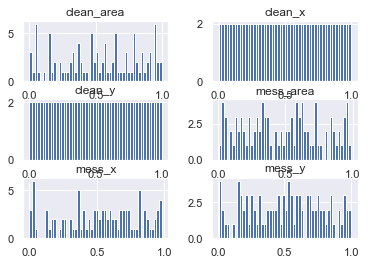

In [3]:
# messy random Data-set
# Fixing random state for reproducibility

clean_data = get_clean_data(100)
messy_data = get_messy_data(100)

# print(clean_data)
clean_data.columns
big_collection = clean_data.join(messy_data)
big_collection.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b88a438>,
      dtype=object)

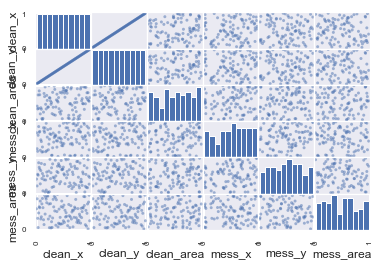

In [4]:
pd.plotting.scatter_matrix(big_collection)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120340eb8>,
      dtype=object)

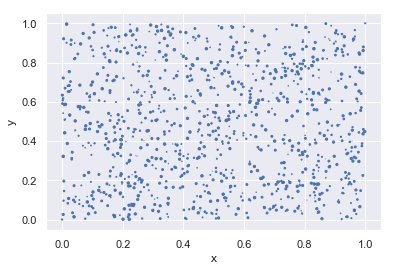

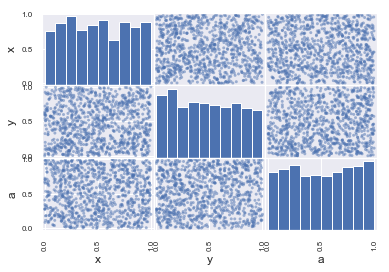

In [9]:
df = pd.DataFrame()

# clean_data = get_clean_data(10)
# messy_data = get_messy_data(90)
df = get_dataset(1000, 0.03)
# for i in big_data.columns:
df.plot(kind='scatter', x='x', y='y', s=2*np.pi*df['a'])

pd.plotting.scatter_matrix(df)

In [6]:
corr_matrix = df.corr()
corr_matrix

,x,y,a
x,1.000000,0.009084,-0.019497
y,0.009084,1.000000,-0.009023
a,-0.019497,-0.009023,1.000000


In [7]:
corr_matrix['a'].sort_values(ascending=False)

a    1.000000
y   -0.009023
x   -0.019497
Name: a, dtype: float64